In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Calculating number of null Values Belonging to each Column
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Above we know there are no column name so we gave indexing and Checked the null values are not there.


In [5]:
df.shape

(214, 11)

In [6]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

<Axes: xlabel='10', ylabel='count'>

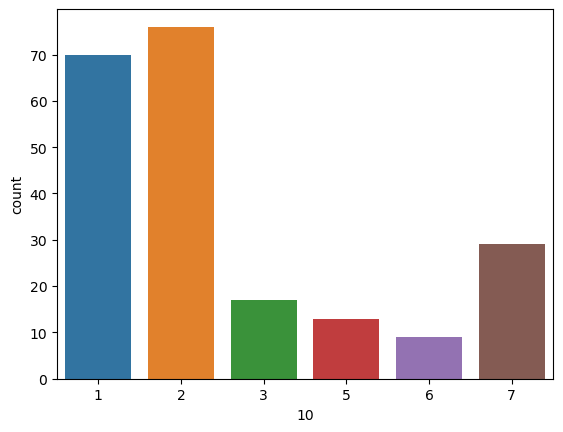

In [7]:
df[10].value_counts()
sns.countplot(x=10, data=df)

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df=df[df.columns[1:11]]

In [10]:
# we can name column according to us as there is no values in headers
df.columns=["A","B","C","D","E","F","G","H","I","J"]

Text(0.5, 1.0, 'Plot 1.1 Boxplot Glass data set')

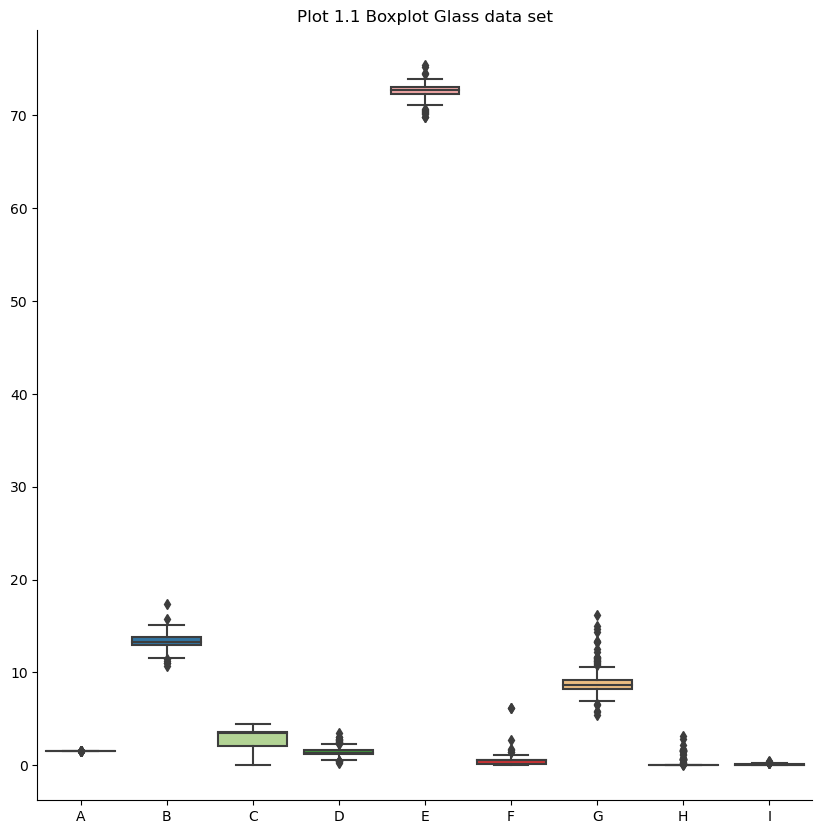

In [11]:
fig,ax=plt.subplots(figsize=(10, 10))
sns.boxplot(data=df.loc[:,"A":"I"], palette='Paired',ax=ax)
sns.despine()
plt.title('Plot 1.1 Boxplot Glass data set')

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x5000 with 0 Axes>

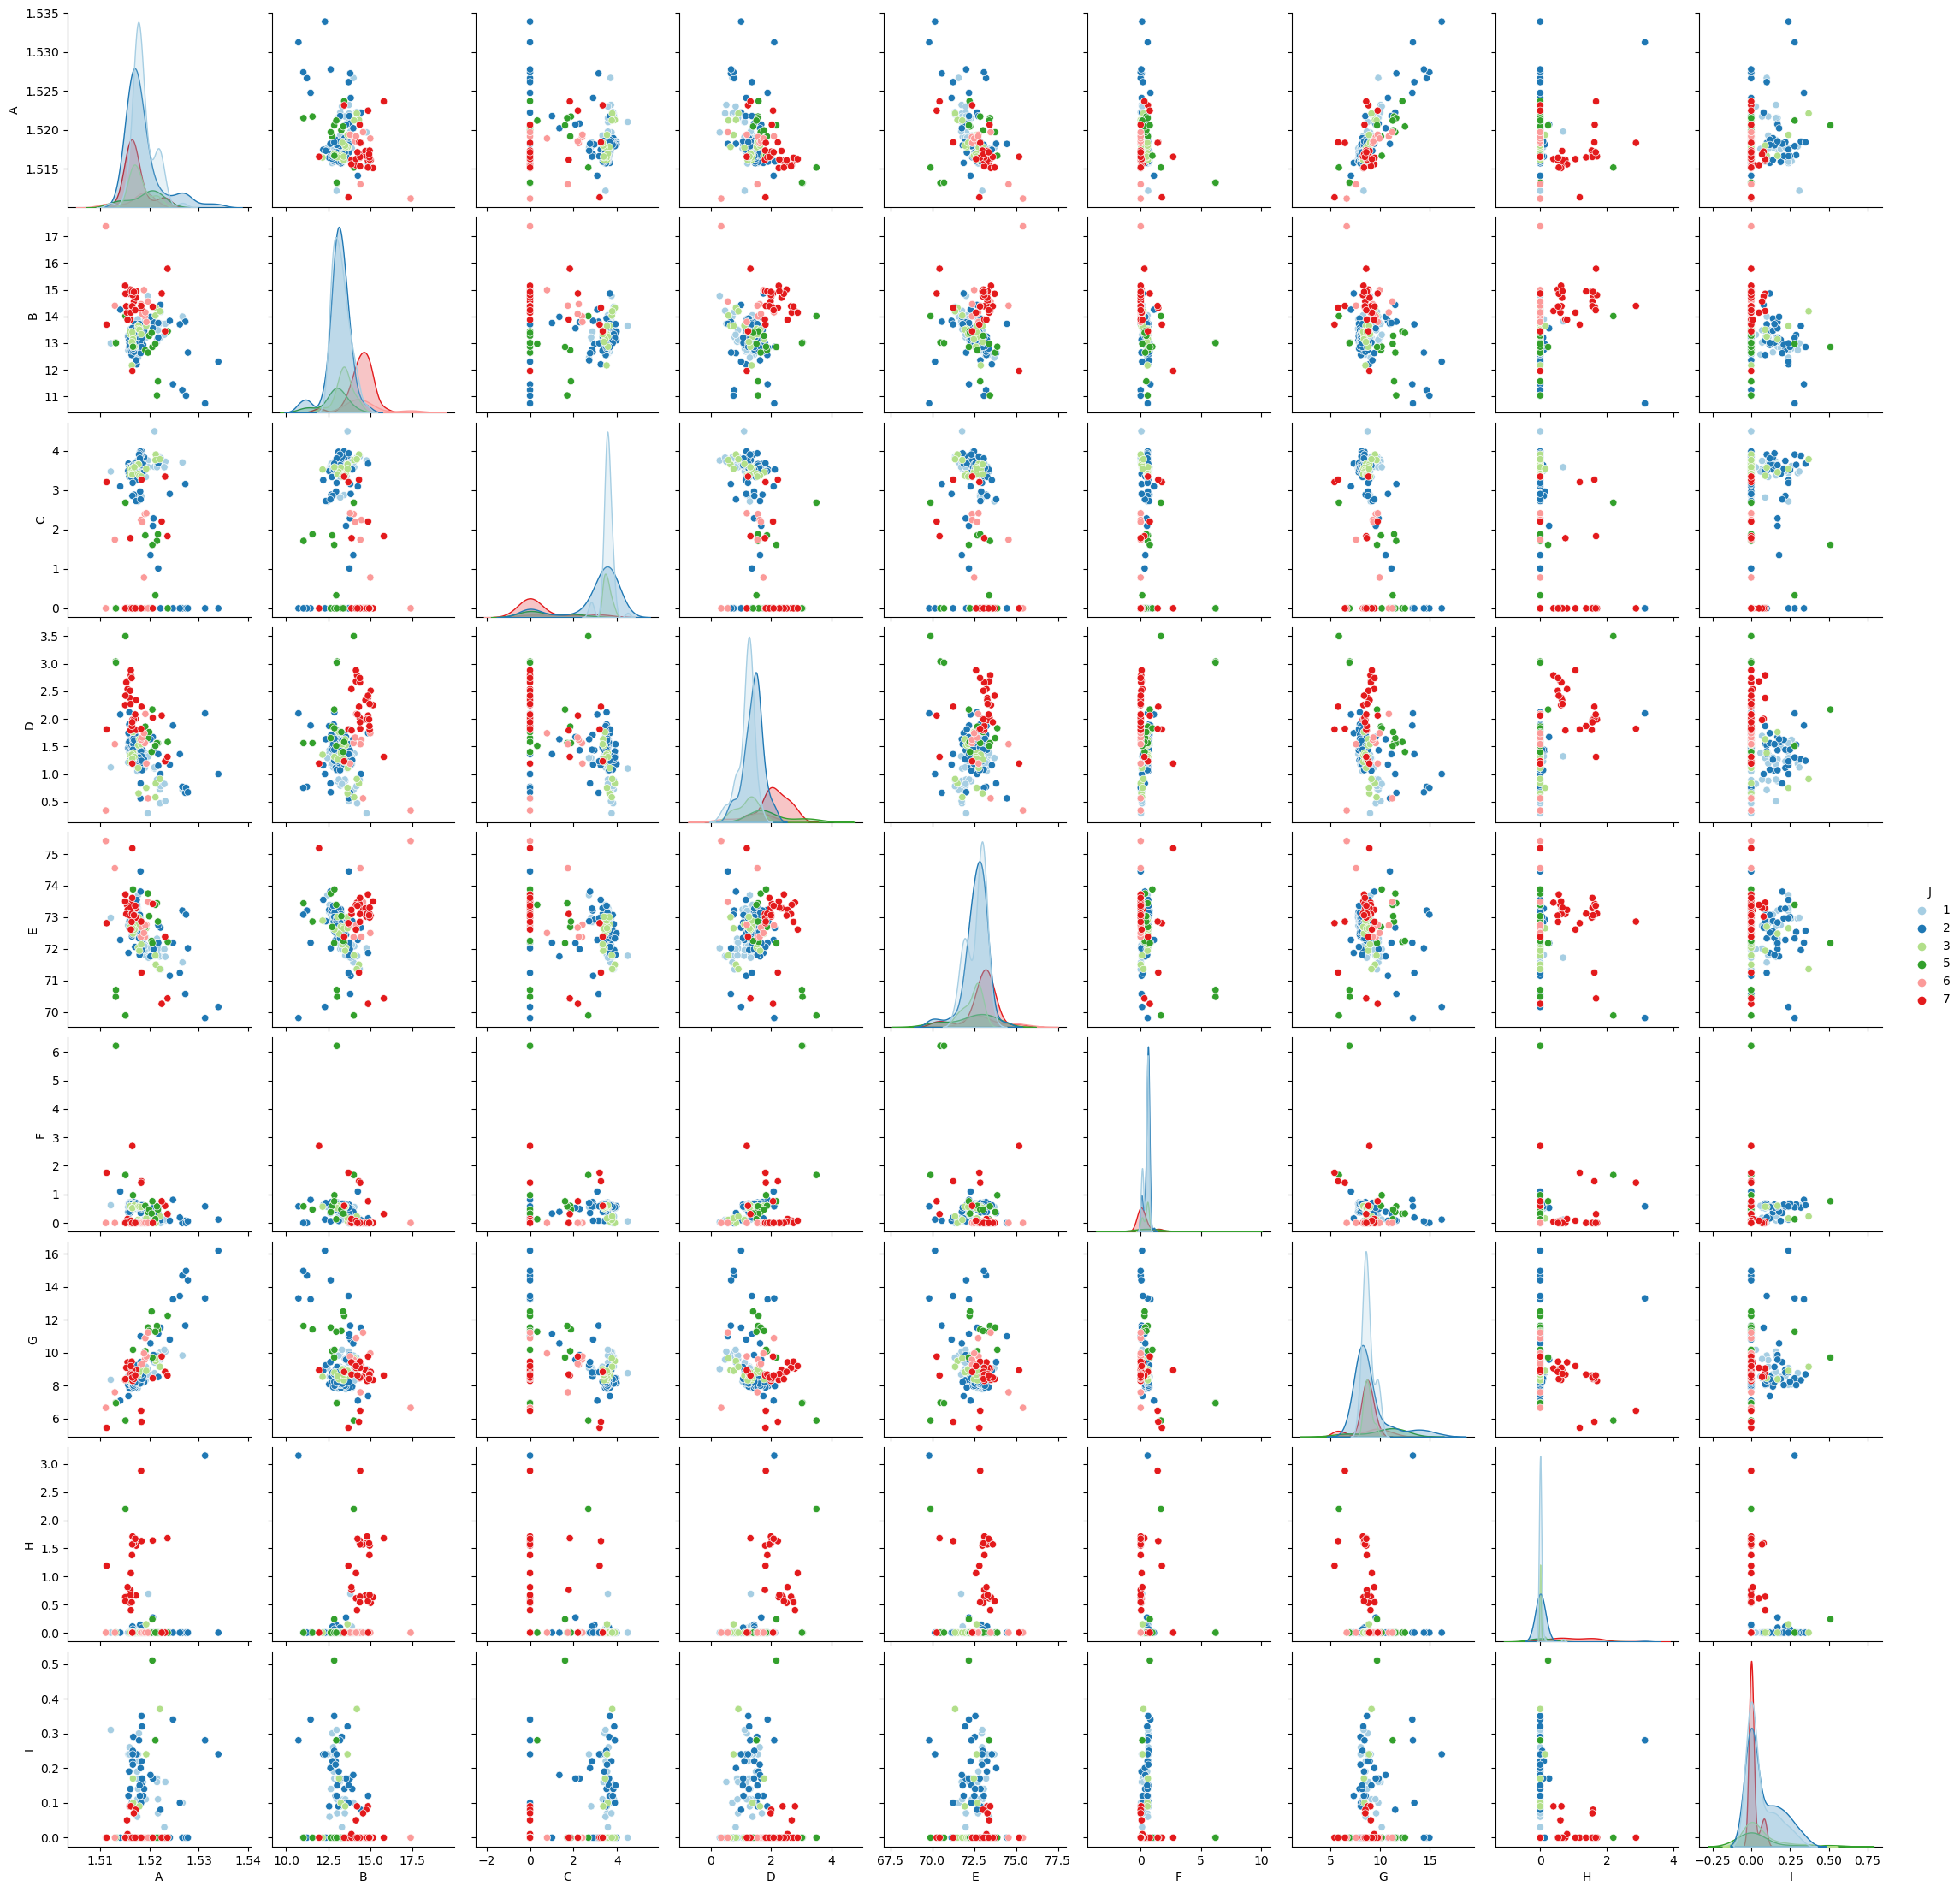

In [12]:
#pairPlot
plt.figure(figsize=[50, 50])
sns.pairplot(df, vars=df.columns[:-1], hue='J', palette='Paired')


<Axes: >

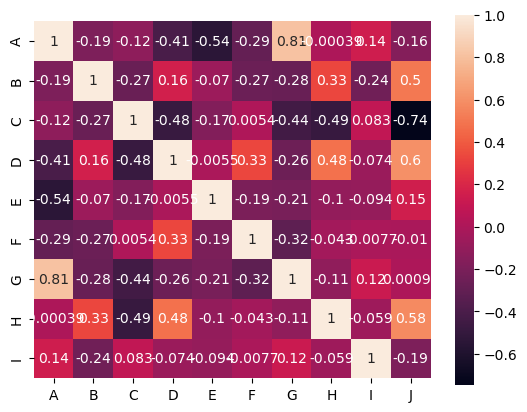

In [13]:
sns.heatmap(df.corr().loc["A":"I"], square=True, annot=True)

In [14]:
df['J'].value_counts()

J
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [15]:
X = df.values[:,:9]
y = df.values[:,9]

In [16]:
from sklearn.model_selection import (train_test_split)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)



print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))


Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)


In [19]:
from sklearn.linear_model import LogisticRegression
Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)
     

0.625
[0.6851851851851852]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.neighbors import KNeighborsClassifier
Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.68125
[0.6296296296296297, 0.6296296296296297, 0.6851851851851852, 0.7037037037037037, 0.6666666666666666, 0.6481481481481481, 0.7037037037037037, 0.7037037037037037, 0.7407407407407407]


In [22]:
from sklearn.svm import SVC
Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)
     

0.7125
[0.6851851851851852]


So we can see SVM is giving Best results